<a href="https://colab.research.google.com/github/Marco-ML/Data-Science/blob/main/Credit_Granting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Situação:

A decisão de concessão de crédito é um fator determinante para o crescimento financeiro do Banco, com isso o Banco x solicitou para que sua equipe de ciência de dados desenvolvesse um modelo de machine learning para auxiliar na tomada de decisão de concessão de crédito com o objetivo de aumentar o percentual de emprestimos que não resultem em inadimplência.

# Objetivo:

Desenvolvimento de um modelo de machine learning para concessão ou não de crédito.

# Análise do problema:

Deverá ser usado modelos de aprendizado supervisionado(classificação e regressão), pois o conjunto de dados está rotulado, dessa forma o algoritmo sabe o que deve ser esperado prever do conjunto de dados.

A preocupação maior será com relação a precisão, ou seja, os Falsos positivos, dessa forma sendo pior classificar um cliente como merecedor de crédito, sendo que não é merecedor, dessa forma emprestando um dinheiro que não retornará, com juros ou sem juros.

Porém, tem que tomar cuidado para não dificultar tanto o crédito, tendo em vista que é um fator de crescimento financeiro para a empresa e também por ter o crédito dificultado o cliente pode procurar concessão de crédito em correspondentes bancários ou por meio do shadow banking, com isso deve-se encontrar um equilibrio entre a concessão ou não de crédito, sendo necessário analisar o f1-score.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Case_ramo/loan-train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Case_ramo/loan-test.csv')

In [4]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Metadado:

Lodn_ID: Atributo que representa a identificação de cada cliente, esse atributo é importante para arquitetura de banco de dados, podendo ser usado como atributo simples ou composto de uma chave primária, porém apenas deve ser usado para isso pelo fato de ser um atributo identificador de usuário e não representa fator de correlação.

Gender: Gênero dos clientes.

Married: Atributo que representa quantos dependentes cada cliente tem.

Education: Grau de escolaridade do cliente.

Self-Employed: Empreendedor ou não.

ApplicantIncome: Renda do cliente.

CoapplicantIncome: Renda do co-aplicante.

LoanAmount: Quantidade de empréstimos.

Loan_Amount_Tem: Prazo para abatimento do valor do empréstimo.

Credit_History: Possui histórico de crédito ou não.

Property_Area: Região de moradia.

Loan_Status: Rótulo de aceite ou não de empréstimo.

# Hipóteses:


Ser empreendedor pode fazer com que a pessoa não consiga quitar um empréstimo no prazo?

Ter muitos dependentes pode fazer com que a pessoa não consiga quitar um empréstimo no prazo?

In [5]:
df_train['TotalIncome'] = list(df_train[['ApplicantIncome', 'CoapplicantIncome']].sum(axis = 1))

In [6]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


<Axes: >

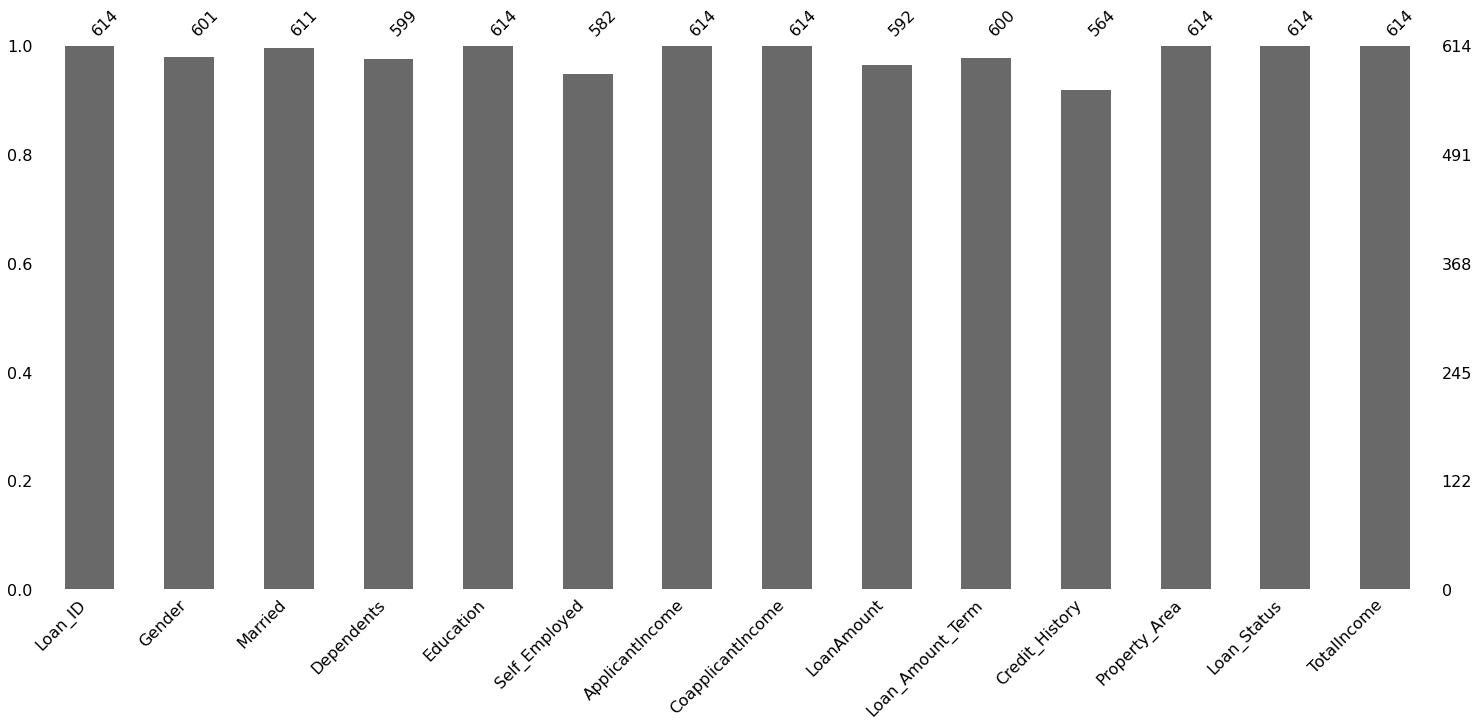

In [8]:
ms.bar(df_train)

In [9]:
df_train.duplicated().any()

False

In [10]:
for i in df_train.columns:
  if type(df_train[i].values[0]) == str:
    display(df_train[i].value_counts())
    print('-'*50)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

--------------------------------------------------


Male      489
Female    112
Name: Gender, dtype: int64

--------------------------------------------------


Yes    398
No     213
Name: Married, dtype: int64

--------------------------------------------------


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

--------------------------------------------------


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

--------------------------------------------------


No     500
Yes     82
Name: Self_Employed, dtype: int64

--------------------------------------------------


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

--------------------------------------------------


Y    422
N    192
Name: Loan_Status, dtype: int64

--------------------------------------------------


In [11]:
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

# Análise Exploratória de Dados

In [12]:
#Esse código aplica porcentagem sobre os gráficos de countplot para poder comparar proporções em amostras de dados desiguais.

def percentage_above_countplot(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

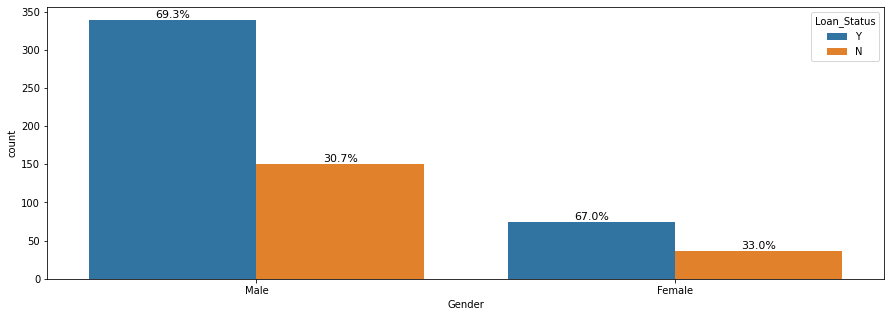

In [13]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Gender", hue="Loan_Status", data=df_train)

percentage_above_countplot(ax3)
plt.show()

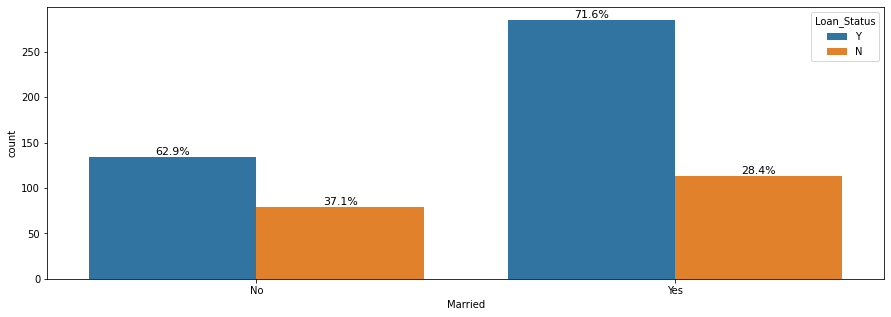

In [14]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Married", hue="Loan_Status", data=df_train)

percentage_above_countplot(ax3)
plt.show()

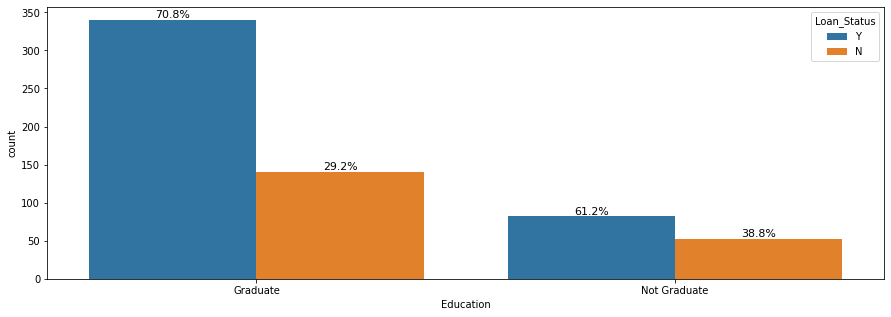

In [15]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Education", hue="Loan_Status", data=df_train)

percentage_above_countplot(ax3)
plt.show()

O gráfico abaixo mostra que há uma chance de aproximadamente 10% a mais de se conseguir crédito morando na área semiurbana, mas não é possível concluir que isso é um fator determinante.

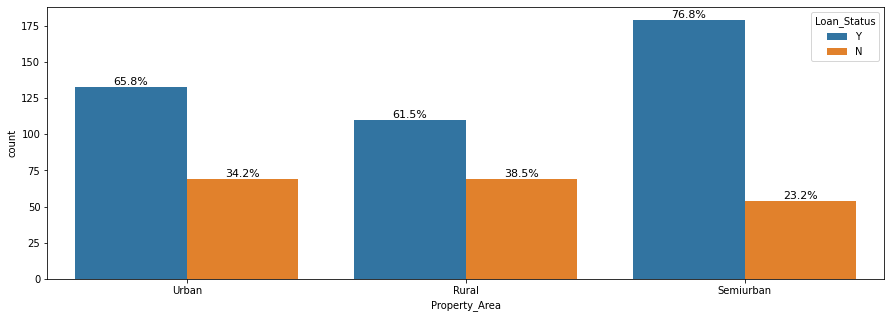

In [16]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Property_Area", hue="Loan_Status", data=df_train)

percentage_above_countplot(ax3)
plt.show()

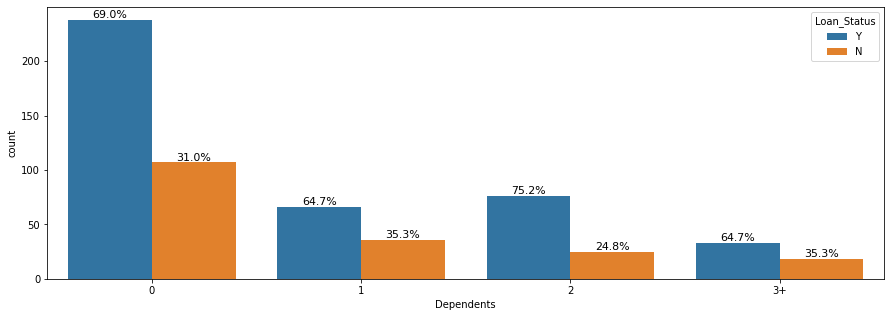

In [17]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Dependents", hue="Loan_Status", data=df_train)

percentage_above_countplot(ax3)
plt.show()

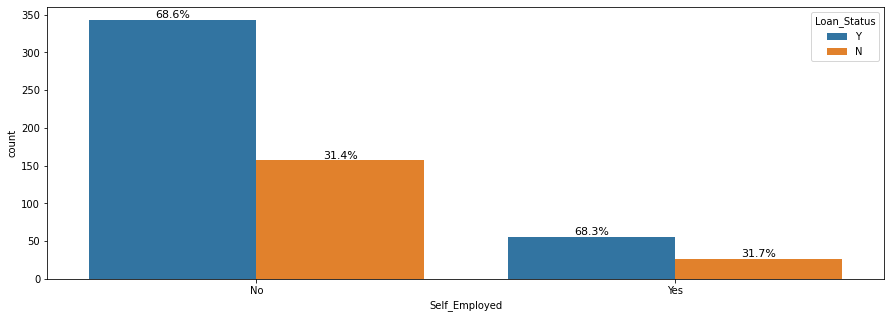

In [18]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Self_Employed", hue="Loan_Status", data=df_train)

percentage_above_countplot(ax3)
plt.show()

O gráfico abaixo torna evitende que há uma grande chance muito alta, por volta de 92% de não conseguir crédito quando o cliente não tem um histórico de crédito.

Por outro lado, há uma chance de aproximadamente 79% de conseguir crédito tendo o histórico de crédito.

Dessa forma, provavelmente esse atributo terá uma correlação forte e positiva com o rótulo e isso será usado para preencher valores nulos.

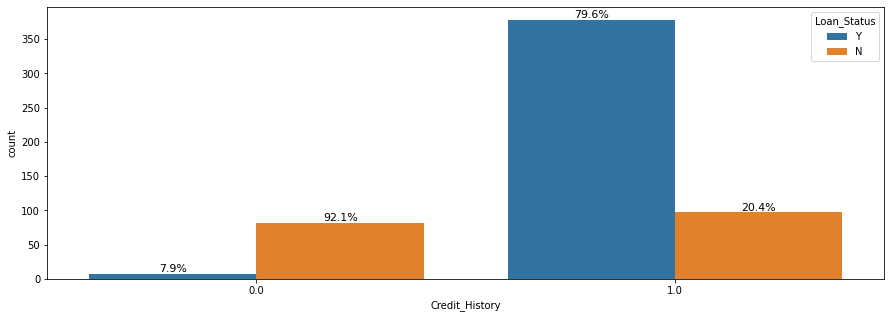

In [19]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Credit_History", hue="Loan_Status", data=df_train)

percentage_above_countplot(ax3)
plt.show()

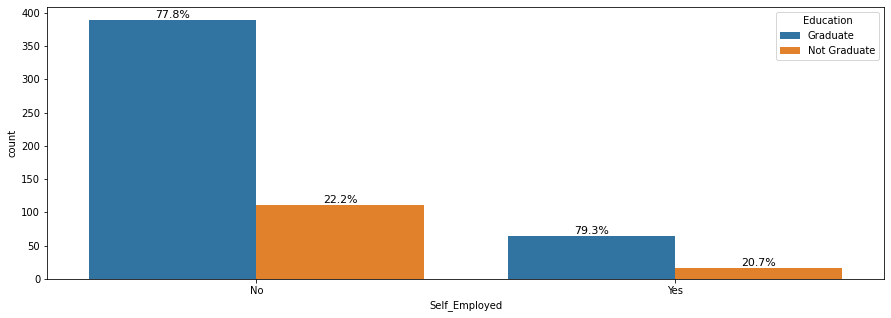

In [20]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Self_Employed", hue="Education", data=df_train)

percentage_above_countplot(ax3)
plt.show()

No gráfico abaixo é possível analisar que um cliente que não é casado tem aproximadamente 81% de chance de não ter nenhum dependente, isso sera usado para preencher valores nulos.

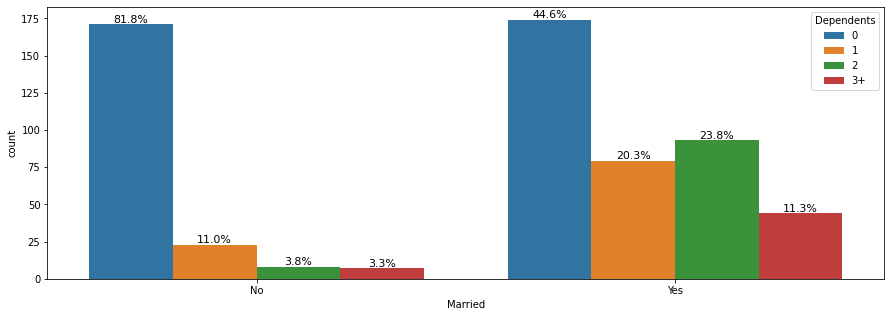

In [21]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Married", hue="Dependents", data=df_train)

percentage_above_countplot(ax3)
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

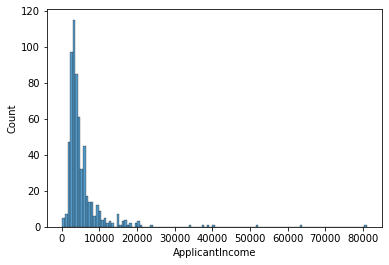

In [22]:
sns.histplot(x = 'ApplicantIncome', data = df_train)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

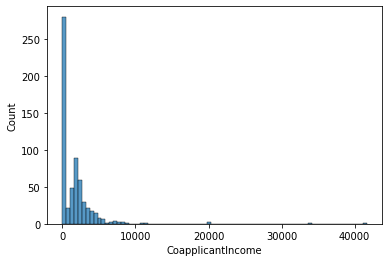

In [23]:
sns.histplot(x = 'CoapplicantIncome', data = df_train)

<Axes: xlabel='LoanAmount', ylabel='Count'>

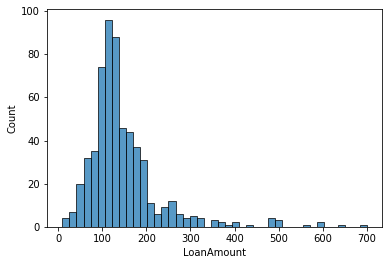

In [24]:
sns.histplot(x = 'LoanAmount', data = df_train)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

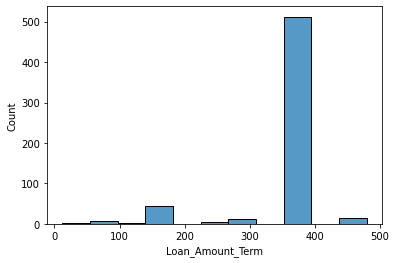

In [25]:
sns.histplot(x = 'Loan_Amount_Term', data = df_train)

<Axes: xlabel='TotalIncome', ylabel='Count'>

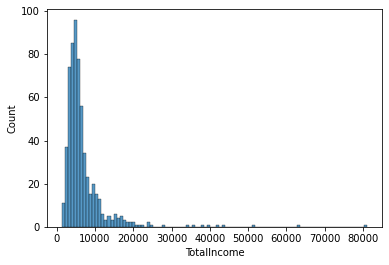

In [26]:
sns.histplot(x = 'TotalIncome', data = df_train)

<Axes: ylabel='ApplicantIncome'>

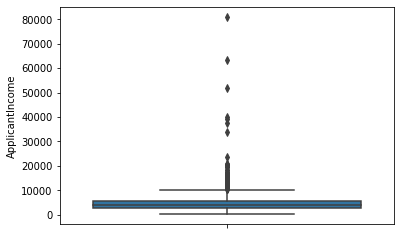

In [27]:
sns.boxplot(data = df_train, y = 'ApplicantIncome')

<Axes: ylabel='CoapplicantIncome'>

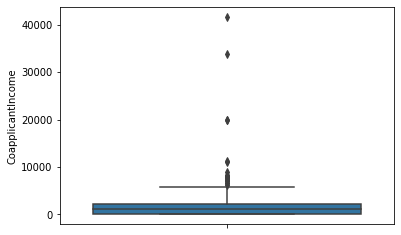

In [28]:
sns.boxplot(data = df_train, y = 'CoapplicantIncome')

In [29]:
df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64

In [30]:
df_train['Credit_History'].loc[(df_train['Loan_Status'] == 'N') & (df_train['Credit_History'].isna())] = 0
df_train['Credit_History'].loc[(df_train['Loan_Status'] == 'Y') & (df_train['Credit_History'].isna())] = 1

<ipython-input-30-c0f87cb48387>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Credit_History'].loc[(df_train['Loan_Status'] == 'N') & (df_train['Credit_History'].isna())] = 0
<ipython-input-30-c0f87cb48387>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Credit_History'].loc[(df_train['Loan_Status'] == 'Y') & (df_train['Credit_History'].isna())] = 1


In [31]:
df_train.isnull().sum().sort_values(ascending=False)

Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64

In [32]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


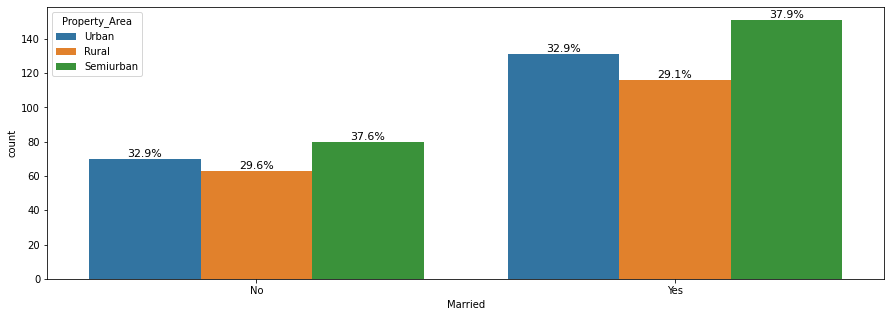

In [33]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Married", hue="Property_Area", data=df_train)

percentage_above_countplot(ax3)
plt.show()

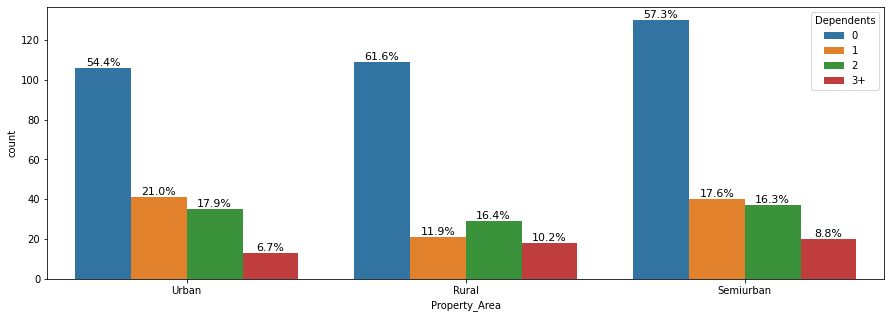

In [34]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Property_Area", hue="Dependents", data=df_train)

percentage_above_countplot(ax3)
plt.show()

In [35]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<Axes: xlabel='CoapplicantIncome'>

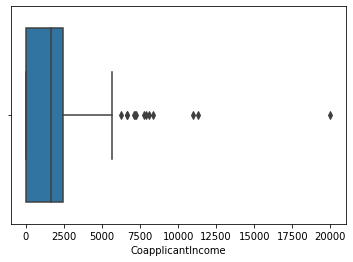

In [36]:
sns.boxplot(x = df_train['CoapplicantIncome'].loc[df_train['Married'] == 'Yes'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

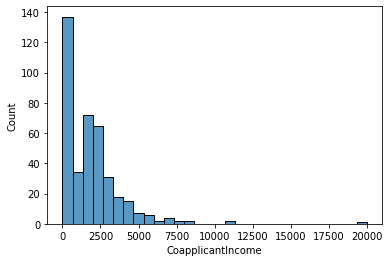

In [37]:
sns.histplot(x = df_train['CoapplicantIncome'].loc[df_train['Married'] == 'Yes'])

Analisando os gráficos abaixo é possível observar que quando o cliente é solteiro o atributo CoapplicantIncome tem uma proporção muito maior para valores nulos se comparado com quando o cliente é casado.

<Axes: xlabel='CoapplicantIncome'>

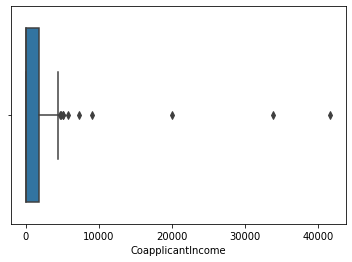

In [38]:
sns.boxplot(x = df_train['CoapplicantIncome'].loc[df_train['Married'] == 'No'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

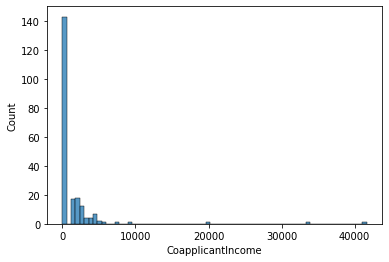

In [39]:
sns.histplot(x = df_train['CoapplicantIncome'].loc[df_train['Married'] == 'No'])

Abaixo é possível analisar que há uma frequência de mais de 10x maior para loan_amount_term de 360, logo os valores faltantes serão subtituidos por esse valor que é a moda.

In [40]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [41]:
df_train['Loan_Amount_Term'].loc[df_train['Loan_Amount_Term'].isna()] = df_train['Loan_Amount_Term'].mode()[0]

<ipython-input-41-17ad4009c9e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Loan_Amount_Term'].loc[df_train['Loan_Amount_Term'].isna()] = df_train['Loan_Amount_Term'].mode()[0]


In [42]:
df_train.loc[df_train['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,4570.0
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,4758.0
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y,10047.0


Os únicos atributos com precisão que podem ser analisados para manipulação no atributos "Married" é o número de dependentes e a renda do conjugue, logo será substituido por esses critérios.

In [43]:
df_train['Married'].loc[(df_train['Married'].isna()) & (df_train['CoapplicantIncome'] == 0)] = 'No'
df_train['Married'].loc[(df_train['Married'].isna()) & (df_train['CoapplicantIncome'] != 0)] = 'Yes'

<ipython-input-43-690fb845dcd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Married'].loc[(df_train['Married'].isna()) & (df_train['CoapplicantIncome'] == 0)] = 'No'
<ipython-input-43-690fb845dcd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Married'].loc[(df_train['Married'].isna()) & (df_train['CoapplicantIncome'] != 0)] = 'Yes'


Como a frequencia de Male é cerca de 4x superior a Female no banco de dados, então será adotada uma proporção de substituição para os valores faltantes.

In [44]:
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [45]:
proporcao = int(len(df_train['Gender'].loc[df_train['Gender'] == 'Female'])*100/len(df_train['Gender'].loc[df_train['Gender'] == 'Male']))
proporcao_f = int(13*proporcao/100)

index = df_train['Gender'].loc[df_train['Gender'].isna()].iloc[0 : proporcao_f].index
for i in index:
  df_train['Gender'].loc[(df_train['Gender'].isna()) & (df_train.index == i)] = 'Female'
df_train['Gender'].loc[df_train['Gender'].isna()] = 'Male'

<ipython-input-45-f5664b57b2d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Gender'].loc[(df_train['Gender'].isna()) & (df_train.index == i)] = 'Female'
<ipython-input-45-f5664b57b2d5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Gender'].loc[df_train['Gender'].isna()] = 'Male'


In [46]:
df_train.isnull().sum().sort_values(ascending=False)

Self_Employed        32
LoanAmount           22
Dependents           15
Loan_ID               0
Gender                0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64

In [47]:
print(len(df_train.loc[(df_train['Married'] == 'No') & (df_train['Dependents'].isna())]))
df_train['Dependents'].loc[(df_train['Married'] == 'No') & (df_train['Dependents'].isna())] = '0'

6


<ipython-input-47-2c91104b7b73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Dependents'].loc[(df_train['Married'] == 'No') & (df_train['Dependents'].isna())] = '0'


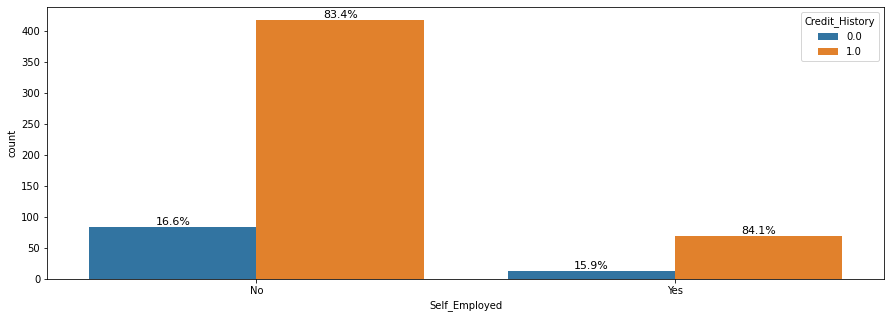

In [48]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Self_Employed", hue="Credit_History", data=df_train)

percentage_above_countplot(ax3)
plt.show()

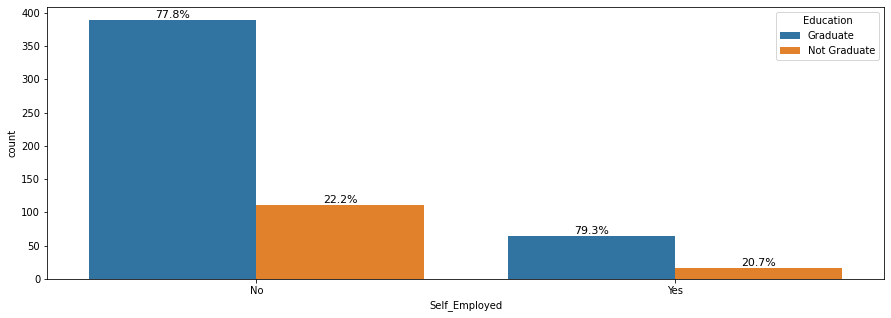

In [49]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Self_Employed", hue="Education", data=df_train)

percentage_above_countplot(ax3)
plt.show()

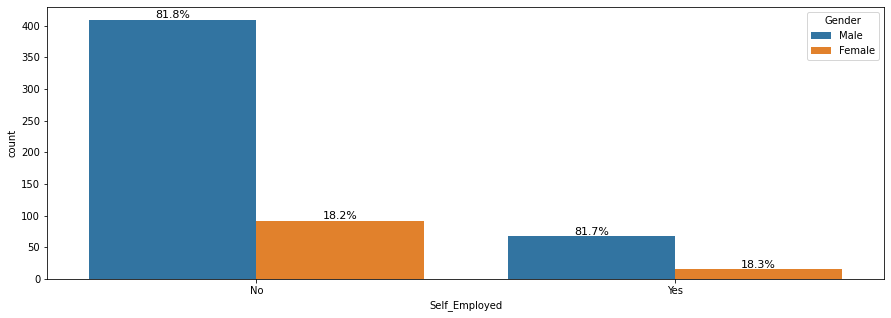

In [50]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Self_Employed", hue="Gender", data=df_train)

percentage_above_countplot(ax3)
plt.show()

Não foi possível encontrar um padrão para Self_Employed

In [51]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Há dados que não foi possível encontrar um padrão ou que tenha espaço amostral muito grande ou incalculável foi escolhido apenas eliminar os valores faltantes, ou seja, foram eliminadas as colunas que continham dados faltantes nas colunas LoanAmount e Loan_Amount_Term, Self_Employed, Dependents.

In [52]:
df_train = df_train.dropna(how = 'any')

Para os dados categóricos que não tem diferenciação de peso será aplicada a transformação dummy de variáveis de modo que não seja atribuido pesos as variáveis.

In [53]:
df_gender = pd.get_dummies(df_train['Gender'])
df_married = pd.get_dummies(df_train['Married']).rename(columns = {'Yes' : 'Yes_Married', 'No' : 'No_Married'})
df_s_e = pd.get_dummies(df_train['Self_Employed']).rename(columns = {'Yes' : 'Yes_Self', 'No' : 'No_Self'})
df_dep = pd.get_dummies(df_train['Dependents']).rename(columns = {'0' : '0 dependent', '1' : '1 dependent', '2' : '2 dependents', '3+' : '3+ dependents'})
df_p_a = pd.get_dummies(df_train['Property_Area'])

In [54]:
df_train = df_train.join(df_gender)
df_train = df_train.join(df_married)
df_train = df_train.join(df_s_e)
df_train = df_train.join(df_dep)
df_train = df_train.join(df_p_a)

Abaixo está sendo feita manipulações se preocupando com o peso das variáveis.

In [55]:
def encode_loan(x):
  if x == 'Y':
    return 1
  elif x == 'N':
    return 0

def encode_graduate(x):
  if x == 'Graduate':
    return 1
  elif x == 'Not Graduate':
    return 0

def encode_all(df):
  df['Education'] = df['Education'].map(encode_graduate)
  df['Loan_Status'] = df['Loan_Status'].map(encode_loan)
  return df

df_train = encode_all(df_train)

In [56]:
df_train.drop('Loan_ID', axis = 1, inplace = True)
df_test.drop('Loan_ID', axis = 1, inplace = True)

In [57]:
df_train.drop(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area'], axis = 1, inplace  = True)

No ranking de correção abaixo é possível concluir que o atributo de Credit_History tem forte e positiva correlação, ou seja, é um atributo que dita grande parte do comportamento dos dados.

Observação: Como há poucos atributos e a maioria dos atributos são dependentes entre sí por conta de ter usado o método dummy, então não será aplicado método de seleção de features diretamente para exclusão de atributos com correlação forte e negativa, isso será feito por meio do método GridSearchCV.

In [58]:
df_train.corr()['Loan_Status'].sort_values(ascending = False)[1:]

Credit_History       0.585398
Semiurban            0.126469
Yes_Married          0.104568
Education            0.069625
2 dependents         0.067394
Male                 0.035519
No_Self              0.005311
Yes_Self            -0.005311
0 dependent         -0.007163
3+ dependents       -0.008960
ApplicantIncome     -0.016124
Urban               -0.024468
Loan_Amount_Term    -0.030640
TotalIncome         -0.032702
LoanAmount          -0.034724
Female              -0.035519
CoapplicantIncome   -0.041682
1 dependent         -0.051484
No_Married          -0.104568
Rural               -0.110582
Name: Loan_Status, dtype: float64

In [59]:
df_train.isnull().sum().sort_values(ascending=False)

Education            0
Yes_Married          0
Semiurban            0
Rural                0
3+ dependents        0
2 dependents         0
1 dependent          0
0 dependent          0
Yes_Self             0
No_Self              0
No_Married           0
ApplicantIncome      0
Male                 0
Female               0
TotalIncome          0
Loan_Status          0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
Urban                0
dtype: int64

In [60]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, log_loss, roc_curve, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          553 non-null    int64  
 1   ApplicantIncome    553 non-null    int64  
 2   CoapplicantIncome  553 non-null    float64
 3   LoanAmount         553 non-null    float64
 4   Loan_Amount_Term   553 non-null    float64
 5   Credit_History     553 non-null    float64
 6   Loan_Status        553 non-null    int64  
 7   TotalIncome        553 non-null    float64
 8   Female             553 non-null    uint8  
 9   Male               553 non-null    uint8  
 10  No_Married         553 non-null    uint8  
 11  Yes_Married        553 non-null    uint8  
 12  No_Self            553 non-null    uint8  
 13  Yes_Self           553 non-null    uint8  
 14  0 dependent        553 non-null    uint8  
 15  1 dependent        553 non-null    uint8  
 16  2 dependents       553 non

In [62]:
y = df_train['Loan_Status']
x = df_train.drop(columns=['Loan_Status'])

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [64]:
lr = LogisticRegression(random_state=0, verbose = False).fit(x_train,y_train)
rd = RandomForestClassifier(random_state=0, verbose = False).fit(x_train,y_train)
nb = GaussianNB().fit(x_train, y_train)
knn = KNeighborsClassifier().fit(x_train, y_train)
svm = SVC(random_state = 0, verbose = False).fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
prev_lr = lr.predict(x_test)
prev_rd = rd.predict(x_test)
prev_nb = nb.predict(x_test)
prev_knn = knn.predict(x_test)
prev_svm = svm.predict(x_test)

In [66]:
print('Accuracy: ', accuracy_score(y_test, prev_lr).round(3))
print('Recall: ', recall_score(y_test, prev_lr).round(3))
print('Precision: ', precision_score(y_test, prev_lr).round(3))
print('f1 score: ', f1_score(y_test, prev_lr).round(3))
print('Loss: ', log_loss(y_test, prev_lr).round(3))

Accuracy:  0.827
Recall:  1.0
Precision:  0.797
f1 score:  0.887
Loss:  6.223


In [67]:
print('Accuracy: ', accuracy_score(y_test, prev_rd).round(3))
print('Recall: ', recall_score(y_test, prev_rd).round(3))
print('Precision: ', precision_score(y_test, prev_rd).round(3))
print('f1 score: ', f1_score(y_test, prev_rd).round(3))
print('Loss: ', log_loss(y_test, prev_rd).round(3))

Accuracy:  0.82
Recall:  0.957
Precision:  0.811
f1 score:  0.878
Loss:  6.483


In [68]:
print('Accuracy: ', accuracy_score(y_test, prev_nb).round(3))
print('Recall: ', recall_score(y_test, prev_nb).round(3))
print('Precision: ', precision_score(y_test, prev_nb).round(3))
print('f1 score: ', f1_score(y_test, prev_nb).round(3))
print('Loss: ', log_loss(y_test, prev_nb).round(3))

Accuracy:  0.813
Recall:  0.968
Precision:  0.798
f1 score:  0.875
Loss:  6.742


In [69]:
print('Accuracy: ', accuracy_score(y_test, prev_knn).round(3))
print('Recall: ', recall_score(y_test, prev_knn).round(3))
print('Precision: ', precision_score(y_test, prev_knn).round(3))
print('f1 score: ', f1_score(y_test, prev_knn).round(3))
print('Loss: ', log_loss(y_test, prev_knn).round(3))

Accuracy:  0.64
Recall:  0.872
Precision:  0.683
f1 score:  0.766
Loss:  12.965


In [70]:
print('Accuracy: ', accuracy_score(y_test, prev_svm).round(3))
print('Recall: ', recall_score(y_test, prev_svm).round(3))
print('Precision: ', precision_score(y_test, prev_svm).round(3))
print('f1 score: ', f1_score(y_test, prev_svm).round(3))
print('Loss: ', log_loss(y_test, prev_svm).round(3))

Accuracy:  0.676
Recall:  1.0
Precision:  0.676
f1 score:  0.807
Loss:  11.669


# Hyper Parameters Tunning

In [71]:
from sklearn.model_selection import GridSearchCV

In [108]:
'''score = []
for i in range(1, 3):
  lr = LogisticRegression(random_state=0)

  parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,i),
  }
  for j in range(2, 4):
    grid = GridSearchCV(lr, param_grid = parameters, cv = j, scoring = "accuracy", verbose = False)
    grid.fit(x_train, y_train)
    prev_grid_lr = grid.predict(x_test)
    score.append(f'i = {i}, j = {j}: ' + str(accuracy_score(y_test, prev_grid_lr).round(3)))
print(score)
    '''

'score = []\nfor i in range(1, 3):\n  lr = LogisticRegression(random_state=0)\n\n  parameters = {\n    \'penalty\' : [\'l1\',\'l2\'], \n    \'C\'       : np.logspace(-3,3,i),\n  }\n  for j in range(2, 4):\n    grid = GridSearchCV(lr, param_grid = parameters, cv = j, scoring = "accuracy", verbose = False)\n    grid.fit(x_train, y_train)\n    prev_grid_lr = grid.predict(x_test)\n    score.append(f\'i = {i}, j = {j}: \' + str(accuracy_score(y_test, prev_grid_lr).round(3)))'

In [74]:
lr = LogisticRegression(random_state=0)

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,2),
  }
grid = GridSearchCV(lr, param_grid = parameters, cv = 2, scoring = "accuracy", verbose = False)
grid.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=2, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.e-03, 1.e+03]), 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=False)

In [75]:
print('Accuracy: ', accuracy_score(y_test, prev_grid_lr).round(3))
print('Recall: ', recall_score(y_test, prev_grid_lr).round(3))
print('Precision: ', precision_score(y_test, prev_grid_lr).round(3))
print('f1 score: ', f1_score(y_test, prev_grid_lr).round(3))
print('Loss: ', log_loss(y_test, prev_grid_lr).round(3))

Accuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964


In [109]:
'''score = []
for i in range(2, 6):
  n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
  max_features = ['auto', 'sqrt']
  max_depth = [1,i]
  min_samples_split = [1, i]
  min_samples_leaf = [1, i]
  bootstrap = [True, False]
  parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
  grid = GridSearchCV(rd, param_grid = parameters, cv = i, scoring = "accuracy", verbose = False)
  grid = grid.fit(x_train, y_train)
  prev_grid_rd = grid.predict(x_test)
  score.append(accuracy_score(y_test, prev_grid_rd).round(3))
print(score)
'''

'score = []\nfor i in range(2, 6):\n  n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]\n  max_features = [\'auto\', \'sqrt\']\n  max_depth = [1,i]\n  min_samples_split = [1, i]\n  min_samples_leaf = [1, i]\n  bootstrap = [True, False]\n  parameters = {\'n_estimators\': n_estimators,\n               \'max_features\': max_features,\n               \'max_depth\': max_depth,\n               \'min_samples_split\': min_samples_split,\n               \'min_samples_leaf\': min_samples_leaf,\n               \'bootstrap\': bootstrap}\n  grid = GridSearchCV(rd, param_grid = parameters, cv = i, scoring = "accuracy", verbose = False)\n  grid = grid.fit(x_train, y_train)\n  prev_grid_rd = grid.predict(x_test)\n  score.append(accuracy_score(y_test, prev_grid_rd).round(3))\nprint(score)\n'

In [78]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [1,5]
min_samples_split = [1, 5]
min_samples_leaf = [1, 5]
bootstrap = [True, False]
parameters = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
grid = GridSearchCV(rd, param_grid = parameters, cv = 5, scoring = "accuracy", verbose = False)
grid = grid.fit(x_train, y_train)
prev_grid_rd = grid.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

In [79]:
print('Accuracy: ', accuracy_score(y_test, prev_grid_rd).round(3))
print('Recall: ', recall_score(y_test, prev_grid_rd).round(3))
print('Precision: ', precision_score(y_test, prev_grid_rd).round(3))
print('f1 score: ', f1_score(y_test, prev_grid_rd).round(3))
print('Loss: ', log_loss(y_test, prev_grid_rd).round(3))

Accuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964


Tunar os hiperparâmetros acarretou em uma melhoria da acurácia, porém o modelo randomforest que havia apresentado maior precisão teve uma perda de 0,019 de precisão, porém teve um ganho de 0,015 de acurácia e redução na loss function, como o foco é manter a maior precisão, então será selecionado o modelo randomforest sem tunar os hiperparâmetros.

# Features Selection

In [80]:
from sklearn.feature_selection import SelectKBest, f_regression

In [81]:
for i in range(1, len(df_train.columns)):
  k = i
  selector = SelectKBest(score_func = f_regression, k = k)
  xtrain_2 = selector.fit_transform(x_train, y_train)
  xtest_2 = selector.transform(x_test)
  lr = LogisticRegression(random_state=0)
  lr = lr.fit(xtrain_2, y_train)
  prev_lr = lr.predict(xtest_2)
  print('K:', k)
  print('Acccuracy: ', accuracy_score(y_test, prev_lr).round(3))
  print('Recall: ', recall_score(y_test, prev_lr).round(3))
  print('Precision: ', precision_score(y_test, prev_lr).round(3))
  print('f1 score: ', f1_score(y_test, prev_lr).round(3))
  print('Loss: ', log_loss(y_test, prev_lr).round(3))
  print('_'*40)

K: 1
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 2
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 3
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 4
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 5
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 6
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 7
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 8
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 13
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 14
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 15
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 16
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 17
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 18


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 19
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 20
Acccuracy:  0.827
Recall:  1.0
Precision:  0.797
f1 score:  0.887
Loss:  6.223
________________________________________


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

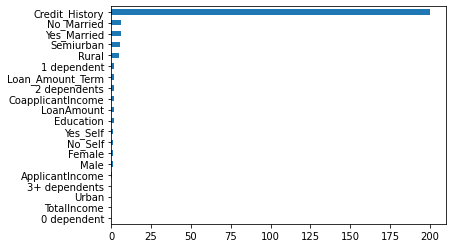

In [82]:
pd.Series(selector.scores_, index = x_train.columns).sort_values().plot.barh()

In [83]:
for i in range(1, len(df_train.columns)):
  k = i
  selector = SelectKBest(score_func = f_regression, k = k)
  xtrain_2 = selector.fit_transform(x_train, y_train)
  xtest_2 = selector.transform(x_test)
  rd = RandomForestClassifier(random_state=0)
  rd.fit(xtrain_2, y_train)
  prev_rd = rd.predict(xtest_2)
  print('K:', k)
  print('Acccuracy: ', accuracy_score(y_test, prev_rd).round(3))
  print('Recall: ', recall_score(y_test, prev_rd).round(3))
  print('Precision: ', precision_score(y_test, prev_rd).round(3))
  print('f1 score: ', f1_score(y_test, prev_rd).round(3))
  print('Loss: ', log_loss(y_test, prev_rd).round(3))
  print('_'*40)

K: 1
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 2
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 3
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 4
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 5
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 6
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 7
Acccuracy:  0.835
Recall:  1.0
Precision:  0.803
f1 score:  0.891
Loss:  5.964
________________________________________
K: 8
Acccuracy:  0.82
Recall:  0.989
Precision:  0.795
f1 score:  0.882
Loss:  6.483
________________________________________

<Axes: >

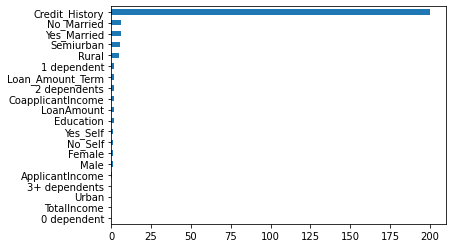

In [84]:
pd.Series(selector.scores_, index = x_train.columns).sort_values().plot.barh()

# Observação:

Pelo resultado, não faz sentido fazer seleção de features, pois os valores da acurácia reduz com relação ao aumento das features, isso demonstra o impacto alto da correlação de Credit_History com Loan_Status.

Como a faixa a accurácia já está na faixa de 70%-90% para os modelos de regressão logistica e randomforest e não houve melhoras selecionando features se comparado com tunar os hiperparametros, então por precaução de não eliminar features que podem ser importantes para o modelo em produção e também pelo fato da maioria das features serem dependentes funcionais, tendo em vista que foi aplicado o método dummy para criar atributos a partir de 1 atributo, então será escolhido manter o número total de features e selecionar o modelo randomforest tunado para i = 5.

In [85]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [87]:
df_test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

Para o tratamento dos valores faltantes do df_test, serão utilizados critérios semelhantes ao df_train, porém como há um "gabarito" que é o arquivo de submit que será testado pelo avaliador do modelo, então é necessário que não seja alterado o formato da tabela de teste dessa forma mantendo a ordem e quantidade corretas para ser testado junto com o arquivo submission.

In [88]:
df_test['Married'].loc[(df_test['Married'].isna()) & (df_test['CoapplicantIncome'] == 0)] = 'No'
df_test['Married'].loc[(df_test['Married'].isna()) & (df_test['CoapplicantIncome'] != 0)] = 'Yes'
df_test['Dependents'].loc[(df_test['Married'] == 'No') & (df_test['Dependents'].isna())] = '0'

proporcao = int(len(df_test['Gender'].loc[df_test['Gender'] == 'Female'])*100/len(df_test['Gender'].loc[df_test['Gender'] == 'Male']))
proporcao_f = int(13*proporcao/100)

index = df_test['Gender'].loc[df_test['Gender'].isna()].iloc[0 : proporcao_f].index
for i in index:
  df_test['Gender'].loc[(df_test['Gender'].isna()) & (df_test.index == i)] = 'Female'
df_test['Gender'].loc[df_test['Gender'].isna()] = 'Male'

<ipython-input-88-391399e208fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Married'].loc[(df_test['Married'].isna()) & (df_test['CoapplicantIncome'] == 0)] = 'No'
<ipython-input-88-391399e208fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Married'].loc[(df_test['Married'].isna()) & (df_test['CoapplicantIncome'] != 0)] = 'Yes'
<ipython-input-88-391399e208fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [89]:
df_test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Loan_Amount_Term      6
Dependents            5
LoanAmount            5
Gender                0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

Como é necessário manter o padrão com o submission, então será realizado calculo de métodos de tendencia central para substituir os valores faltantes, como moda para valor categóricos e mediana para valores numéricos como renda e valor de empréstimo.

In [90]:
df_test['Loan_Amount_Term'].loc[df_test['Loan_Amount_Term'].isna()] = df_test['Loan_Amount_Term'].mode()[0]
df_test['LoanAmount'].loc[df_test['LoanAmount'].isna()] = df_test['LoanAmount'].median()
df_test['Dependents'].loc[df_test['Dependents'].isna()] = df_test['Dependents'].mode()[0]
df_test['Self_Employed'].loc[df_test['Self_Employed'].isna()] = df_test['Self_Employed'].mode()[0]
df_test['Credit_History'].loc[df_test['Credit_History'].isna()] = df_test['Credit_History'].mode()[0]

<ipython-input-90-7b59400899e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Loan_Amount_Term'].loc[df_test['Loan_Amount_Term'].isna()] = df_test['Loan_Amount_Term'].mode()[0]
<ipython-input-90-7b59400899e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['LoanAmount'].loc[df_test['LoanAmount'].isna()] = df_test['LoanAmount'].median()
<ipython-input-90-7b59400899e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [91]:
df_test.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [92]:
def encode_graduate(x):
  if x == 'Graduate':
    return 1
  elif x == 'Not Graduate':
    return 0

def encode_all(df):
  df['Education'] = df['Education'].map(encode_graduate)
  return df

df_test = encode_all(df_test)

In [93]:
df_test['TotalIncome'] = list(df_test[['ApplicantIncome', 'CoapplicantIncome']].sum(axis = 1))

In [94]:
df_gender = pd.get_dummies(df_test['Gender'])
df_married = pd.get_dummies(df_test['Married']).rename(columns = {'Yes' : 'Yes_Married', 'No' : 'No_Married'})
df_s_e = pd.get_dummies(df_test['Self_Employed']).rename(columns = {'Yes' : 'Yes_Self', 'No' : 'No_Self'})
df_dep = pd.get_dummies(df_test['Dependents']).rename(columns = {'0' : '0 dependent', '1' : '1 dependent', '2' : '2 dependents', '3+' : '3+ dependents'})
df_p_a = pd.get_dummies(df_test['Property_Area'])
df_test = df_test.join(df_gender)
df_test = df_test.join(df_married)
df_test = df_test.join(df_s_e)
df_test = df_test.join(df_dep)
df_test = df_test.join(df_p_a)

In [95]:
df_test.drop(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area'], axis = 1, inplace  = True)

In [96]:
X_train = df_train.drop(columns=['Loan_Status'])
y_train = df_train['Loan_Status']

Foi encontrado um arquivo onde todos os clientes com CH = 0,não recebem crédito e CH = 1 recebem crédito de modo a analisar se o modelo espalharia esse comportamento, uma vez que a correlação de CH com Loan_Status é positivamente forte.

In [97]:
submission = pd.read_csv('/content/drive/MyDrive/Case_ramo/credit_history_based.csv')

In [98]:
y_test = submission['Loan_Status']

In [99]:
X_test = df_test

In [100]:
rd = RandomForestClassifier(random_state=0)
rd.fit(X_train, y_train)
prev_rd = rd.predict(X_test)

In [101]:
print('Accuracy: ', accuracy_score(y_test, prev_rd).round(3))
print('Recall: ', recall_score(y_test, prev_rd).round(3))
print('Precision: ', precision_score(y_test, prev_rd).round(3))
print('f1 score: ', f1_score(y_test, prev_rd).round(3))
print('Loss: ', log_loss(y_test, prev_rd).round(3))

Accuracy:  0.948
Recall:  0.942
Precision:  0.997
f1 score:  0.968
Loss:  1.866


In [102]:
df_test_2 = df_test.join(submission['Loan_Status'])

In [103]:
df_test_2

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Female,Male,No_Married,...,No_Self,Yes_Self,0 dependent,1 dependent,2 dependents,3+ dependents,Rural,Semiurban,Urban,Loan_Status
0,1,5720,0,110.0,360.0,1.0,5720,0,1,0,...,1,0,1,0,0,0,0,0,1,1
1,1,3076,1500,126.0,360.0,1.0,4576,0,1,0,...,1,0,0,1,0,0,0,0,1,1
2,1,5000,1800,208.0,360.0,1.0,6800,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,1,2340,2546,100.0,360.0,1.0,4886,0,1,0,...,1,0,0,0,1,0,0,0,1,1
4,0,3276,0,78.0,360.0,1.0,3276,0,1,1,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,4009,1777,113.0,360.0,1.0,5786,0,1,0,...,0,1,0,0,0,1,0,0,1,1
363,1,4158,709,115.0,360.0,1.0,4867,0,1,0,...,1,0,1,0,0,0,0,0,1,1
364,1,3250,1993,126.0,360.0,1.0,5243,0,1,1,...,1,0,1,0,0,0,0,1,0,1
365,1,5000,2393,158.0,360.0,1.0,7393,0,1,0,...,1,0,1,0,0,0,1,0,0,1


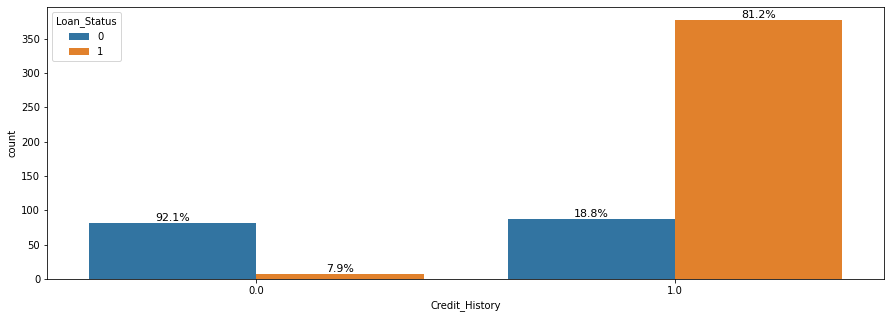

In [104]:
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(x="Credit_History", hue="Loan_Status", data=df_train)

percentage_above_countplot(ax3)
plt.show()

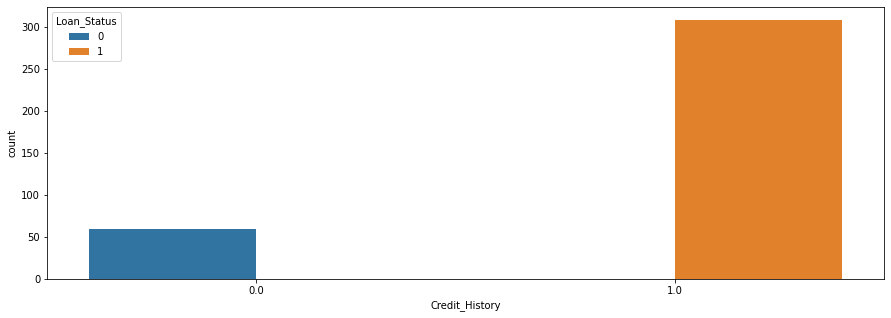

In [105]:
plt.figure(figsize=(15, 5))
sns.countplot(x="Credit_History", hue="Loan_Status", data=df_test_2)

percentage_above_countplot(ax3)
plt.show()

In [106]:
df_test_3 = df_test.join(pd.DataFrame(prev_rd))

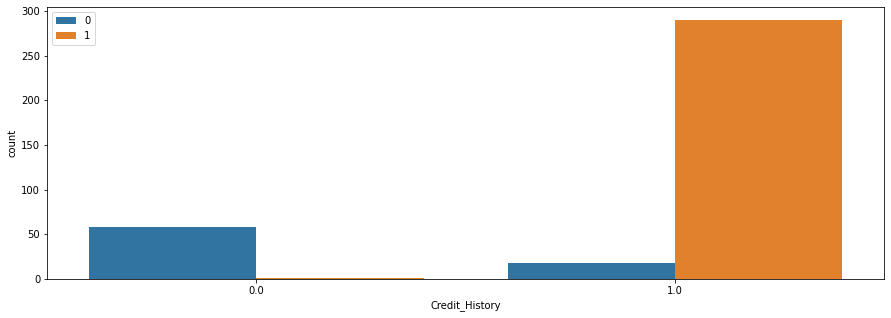

In [107]:
plt.figure(figsize=(15, 5))
sns.countplot(x="Credit_History", hue=0, data=df_test_3)

percentage_above_countplot(ax3)
plt.show()

O modelo não seguiu a condição de CH = 0 -> Status = 0, CH = 1 -> Status = 1, o que é bom, pois nos dados de treino é possível observar que há uma quantidade significativa de dados que não seguem esse padrão, e tem chance dos dados em produção(teste) seguirem um comportamento parecido com os dados de treino.

Analisando o gráfico de predição o fato de não ter credit history está mais próximo ao gráfico encontrado nos dados de treino, porém para o fator de ter crédit history não acompanhou de forma tão semelhante.

Uma explicação para isso é que foi escolhido o modelo de maior precisão, ou seja, o modelo penaliza mais os FPs em detrimento dos FNs, com isso é melhor negar crédito para um FP ao conceder crédito, dessa forma evitando que a empresa perca dinheiro.

Explicação:

Empréstimo - 30K

Total de juros em x período - 20K

A empresa empresta 30K na condição de receber 20K de lucro, ou seja, se houver inadimplencia, a empresa terá perdido 30K e deixado de receber 20K, nesse caso vale mais a pena a empresa não emprestar os 30K e poupar esse dinheiro, que no exemplo é aproximadamente 6 vezes maior.